# Tutorial Exercises 1: Simulating Normal data

In this section we apply what we have learned about simulating data from a binomial distribution, but instead we will simulate some data from a normal distribution

## Heights example

Let's simulate a dataset with the heights of 10,000 men and 10,000 women, based on our knowledge that

* height is normally distributed
* we know the mean and sd of mens' and womens' heights in the UK

### Set up Python libraries

As usual, run the code cell below to import the relevant Python libraries

In [1]:
# Set-up Python libraries - you need to run this but you don't need to change it
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
import pandas as pd
import seaborn as sns
sns.set_theme(style='white')
import statsmodels.api as sm
import statsmodels.formula.api as smf
import warnings 
warnings.simplefilter('ignore', category=FutureWarning)

### Create the simulated dataset

We use the function `np.random.normal()` to create random numbers that follow a normal distribution. 
* `np.random.normal()` is from the same 'family' of functions as `np.random.binomial()` which we met previously


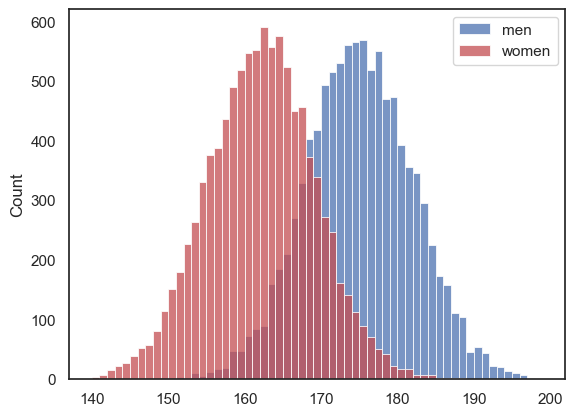

In [2]:
men = np.random.normal(175,7, [10000])
women = np.random.normal(162,7, [10000])

sns.histplot(men, color='b', label='men', bins=np.arange(140,200,1))
sns.histplot(women, color='r', label='women', bins=np.arange(140,200,1))
plt.legend()
plt.show()


<ul>
<li>Where in the code do we specify the mean of the desired distribution?
<li>Where in the code do we specify the standard deviation of the desired distribution?
<li>Where in the code do we specify the sample size to be simulated?
</ul>

## Parameters of the Normal Distrubition

All normally distributed variables have the same *shape* of distribution (the bell curve), but two parameters determine the location and spread of the distribution - 


* the mean $\mu$ determines the location of the curve along the x axis
* the standard deviation $\sigma$ determines the spread or width of the curve
    
We sometimes describe a normal distribution using the following notation:

$$ x \sim  \mathcal{N}(\mu, \sigma) $$
    
pronounced "$x$ follows a Normal with mean $\mu$ (mu) and standard deviation $\sigma$ (sigma)"
    
for example
    
$$ height \sim  \mathcal{N}(162, 7) $$
    
... describes the distribution of womens' heights used above



### Plotting the PDF

We can *plot* a Normal distribution with any parameters $ y \sim  \mathcal{N}(\mu, \sigma) $, by:

* defining the range of $x$ values for which to plot the distribution
* finding the corresponding probabilities, which become the $y$-values for our plotted line
 
Let's work through an example. Men's heights are distributed as follows:

$$ h_m \sim  \mathcal{N}(175, 7) $$

First we define the x-axis values for which we wish to plot the PDF, using `np.arange()`:

In [3]:
# Use the function np.arange() to get the values of height to plot
# These should be a range from 150-200cm in 0.1cm intervals

# Complete the code:
# x=np.arange(.....)

Now we get the corresponding probabilities, using `stats.norm.pdf()`:

In [4]:
# complete the code
#px = stats.norm.pdf(x, .........)

Finally we produce the plot:

In [5]:
# Uncomment and run this
#plt.plot(x,px)
#plt.xlabel('$x$')
#plt.ylabel('$p(x)$')
#plt.show()

### More examples

#### Women's heights

Can you copy and adapt the code above, to plot the distribution of women's heights?

$$ h_w \sim  \mathcal{N}(162, 7) $$

You may need to adjust the x-axis values.


In [6]:
# Your code here

#### Overlay several normal distributions

Copy and adapt the code above to plot the following normal distributions, all on the same graph:

* $ x_1 \sim  \mathcal{N}(30, 7) $
* $ x_2 \sim  \mathcal{N}(30, 15) $
* $ x_3 \sim  \mathcal{N}(60, 7) $

In [7]:
#x = np.arange.......

# Your code here to create and plot the distributions

# uncomment this!
#plt.xlabel('$x$')
#plt.ylabel('$p(x)$')
#plt.show()

### Scaling the PDF

If we want to check how well a histogram of simulated (or real) data conforms to a normal distribution, we may need to make a figure in which the Normal distribution curve (from `stats.normal.pdf()`) is overlaid on a histogram.

Looking at the Normal distributions plotted above, notice the scale on the $y$-axis - this is chosen so that the area under the curve is equal to one (because it's a probability distribution).

In constrast, the 'area under the curve' for a histogram is equal to the total number of datapoints in the sample - for example when we plot the height of 10000 people in 1cm-wide bins, the 'area' of the histogram is 10000.

Compare:

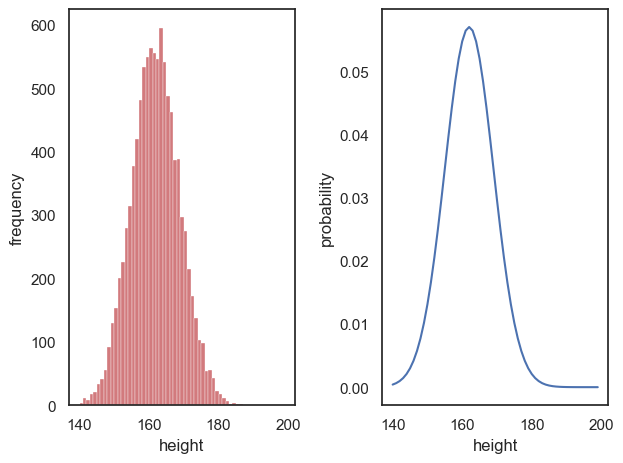

In [8]:
plt.subplot(1,2,1)
women = np.random.normal(162,7, [10000])
sns.histplot(women, color='r', label='women', bins=np.arange(140,200,1))
plt.xlabel('height')
plt.ylabel('frequency')

plt.subplot(1,2,2)
x = np.arange(140,200,1)
hw = stats.norm.pdf(x, 162,7)
plt.plot(x,hw)
plt.xlabel('height')
plt.ylabel('probability')

plt.tight_layout()
plt.show()

To overlay the normal curve from `stats.norm.pdf()`  on the histogram we will need to multiply the $y$ values by 10000.

Can you modify the code below to make the scales match for the curve and the histogram?

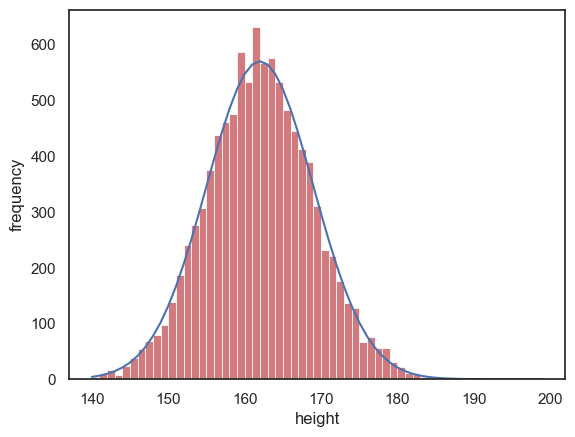

In [9]:
women = np.random.normal(162,7, [10000])
sns.histplot(women, color='r', label='women', bins=np.arange(140,200,1))
x = np.arange(140,200,1)
hw = stats.norm.pdf(x, 162,7)
plt.plot(x,hw*10000) # modify this line so the curve is on the same scale as the histogram

plt.xlabel('height')
plt.ylabel('frequency')
plt.show()

### The Normal CDF



If we want to know what proportion of women are over 180cm (6') tall, we can work it out using the CDF - the proportion *greater than* 180cm tall is 1-CDF(180)

In [10]:
1 - stats.norm.cdf(180,162,7)

np.float64(0.005063995274695365)

... about half of one percent, or one in two hundred women are over 180cm/6' tall.

<ul>
    <li>Can you check what proportion of simulated women were over 180cm tall? 
    <li>Does it match the value from the theoretical CDF quite well?
</ul>

In [11]:
# Your code here